In [1]:
import gc
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
def generate_dataset(n_samples, n_features, noise=0.1):

    print('Generating dataset...')

    X, y, coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=noise,
        coef=True,
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

    gc.collect()

    print('Dataset generated....')

    return X_train, y_train, X_test, y_test

In [5]:
def bulk_predict(X_test, y_test, model):

    prediction_latencies = []

    for i in range(20):
        start = time.time()
        y_pred = model.predict(X_test)
        prediction_latencies.append(time.time() - start)
    
    return prediction_latencies

In [10]:
def build_and_predict(model):

    prediction_latencies_dict = {}

    for num_features in range(100, 1001, 100):
        X_train, y_train, X_test, y_test = generate_dataset(n_samples=10000, n_features=num_features)
        model.fit(X_train, y_train)
        prediction_latencies_dict[str(num_features)] = bulk_predict(X_test, y_test, model)
    
    return prediction_latencies_dict

In [7]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.8)
sgd_model = SGDRegressor(tol=1e-4,
                            penalty='elasticnet',
                            l1_ratio=0.25,
                            alpha=0.01)
sv_model = SVR(kernel='rbf', gamma='scale')
dt_model = DecisionTreeRegressor(max_depth=10)
rf_model = RandomForestRegressor(n_estimators=20)

In [11]:
model_and_num_features = {}
model_dict = {
    'Linear Regression': linear_model,
    'Lasso Regression': lasso_model,
    'SGD Regression': sgd_model,
    'Support Vector Regression': sv_model,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_model,
}
for model in model_dict:
    model_and_num_features[model] = build_and_predict(model_dict[model])

Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset generated....
Generating dataset...
Dataset ge

In [20]:
latencies_df = pd.DataFrame()
for model in model_and_num_features:
    for num_features in model_and_num_features[model]:
        latencies_df.loc[num_features, model] = np.mean(model_and_num_features[model][num_features])
latencies_df.head()

,Linear Regression,Lasso Regression,SGD Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression
100,0.000538,0.000350,0.000408,1.010025,0.000669,0.011158
200,0.000600,0.000555,0.000699,1.226674,0.001363,0.012448
300,0.001125,0.000863,0.000904,2.204468,0.002000,0.014000
400,0.001388,0.001432,0.001540,3.314157,0.002600,0.015349
500,0.002586,0.001778,0.001824,4.357831,0.003202,0.018150


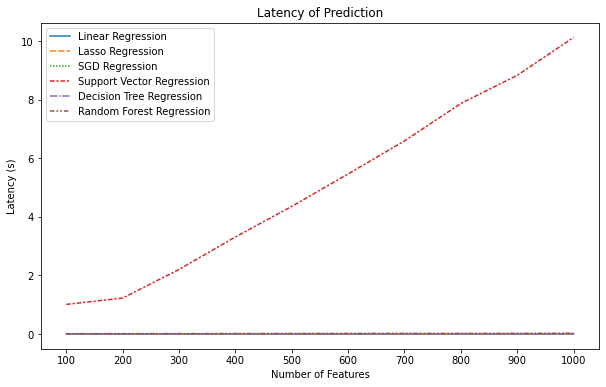

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=latencies_df, palette='tab10')
plt.title('Latency of Prediction')
plt.xlabel('Number of Features')
plt.ylabel('Latency (s)')
plt.show();

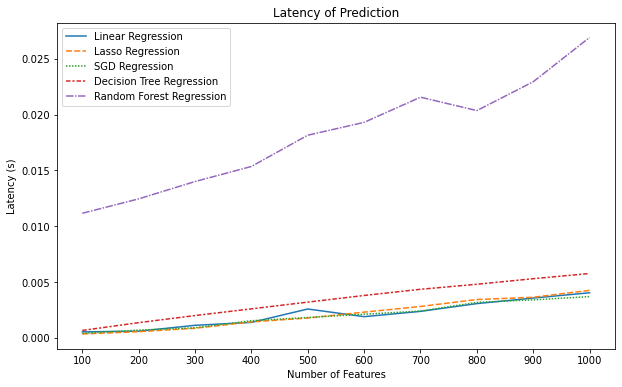

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=latencies_df.drop(columns='Support Vector Regression'), palette='tab10')
plt.title('Latency of Prediction')
plt.xlabel('Number of Features')
plt.ylabel('Latency (s)')
plt.show();

In [23]:
gc.collect()

9076